## Домашнее задание по блоку 08.04.2021. Задачи классификации и кластеризации
### Тихонова Инна

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14,6

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

1. Возьмите датасет с цветками iris’а

In [2]:
iris = load_iris()

In [3]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [5]:
data_sepal = data[['sepal length (cm)', 'sepal width (cm)']]
data_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3. Разделите данные на выборку для обучения и тестирования

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_sepal, variety, test_size=0.25)

4. Постройте модель LDA

In [8]:
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(X_test)

array([1, 0, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0])

In [11]:
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

5. Визуализируйте предсказания для тестовой выборки и центры классов

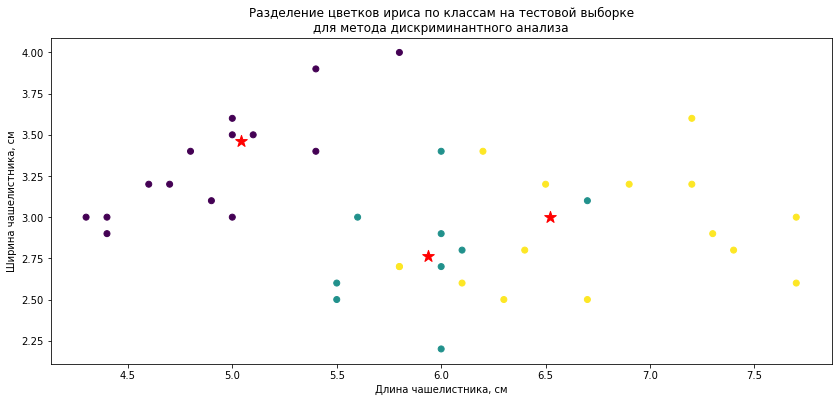

In [12]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

plt.title('Разделение цветков ириса по классам на тестовой выборке\nдля метода дискриминантного анализа')
plt.ylabel('Ширина чашелистника, см')
plt.xlabel('Длина чашелистника, см')

plt.show()

6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [13]:
data_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [14]:
k_inertia = []
ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_sepal)
    k_inertia.append(clf_kmeans.inertia_)

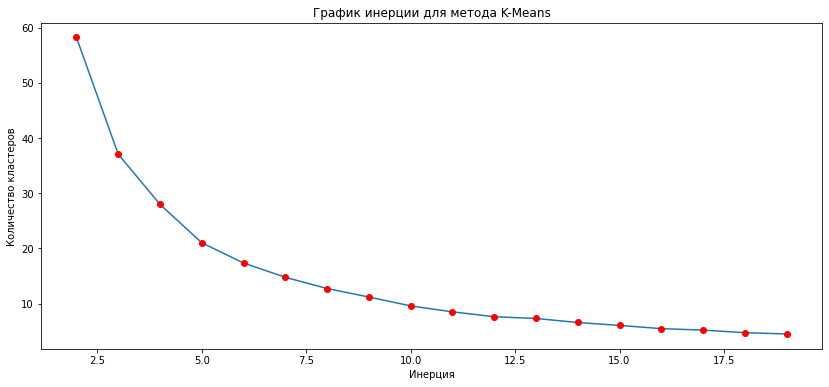

In [15]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

plt.title('График инерции для метода K-Means')
plt.ylabel('Количество кластеров')
plt.xlabel('Инерция')

plt.show()

Оптимальным количеством кластеров выберем 5 кластеров.

In [16]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(data_sepal)
clusters

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 4, 4, 0, 0, 4,
       4, 0, 4, 0, 4, 4, 2, 1, 1, 3, 1, 3, 1, 0, 1, 0, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 1, 3, 2, 1, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 3, 3, 1, 2, 2, 2,
       1, 1, 3, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

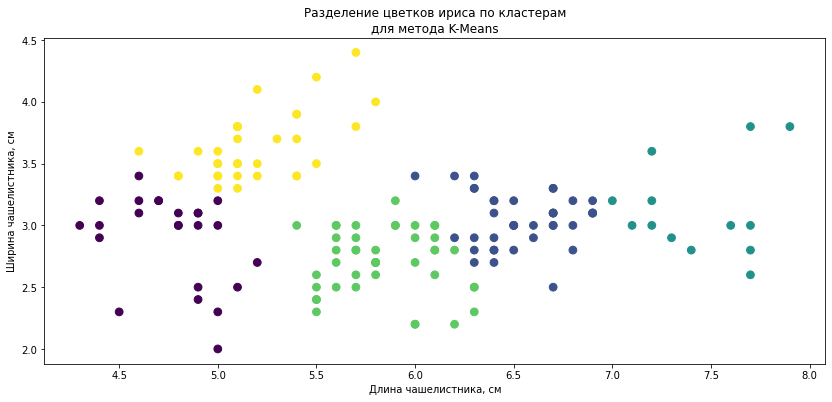

In [17]:
plt.scatter(data_sepal['sepal length (cm)'], data_sepal['sepal width (cm)'], c=clusters, s=60)

plt.title('Разделение цветков ириса по кластерам\nдля метода K-Means')
plt.ylabel('Ширина чашелистника, см')
plt.xlabel('Длина чашелистника, см')

plt.show()